In [1]:
%matplotlib inline
import keras
from keras.datasets import cifar10, cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LeakyReLU
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.models import load_model
from keras import backend
import numpy as np
import matplotlib.pyplot as plt
import time

Using TensorFlow backend.


In [2]:
# for CIFAR-10 there are 10 classes
num_classes = 10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# normalize the data (simple)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


('x_train shape:', (50000, 32, 32, 3))
(50000, 'train samples')
(10000, 'test samples')


In [4]:
# break the data into train and test data
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.05, random_state=7)

In [5]:
'''
NOTE: Initially experimentation on my personal laptop. Isn't quite powerful. So epochs are less
        which is good enough to understand what's going on.

'''

# MODEL 1
# model = Sequential()
# model.add(Conv2D(64, (2, 2), bias=True, strides=(2, 2), padding='same', input_shape=x_train.shape[1:]))
# model.add(Activation('relu'))
# model.add(Flatten())
# model.add(Dense(10, bias=True, activation='softmax'))

'''
Setup: Model 1, data not normalized, RELU activation.
Result: Model doing worse than random guessing. First fix this. we could
    1. Change the activation function
    2. Normalize the data (pick this, you should anyways normalize (this helps speed up the training process and
        likely makes loss function less spread out)
        
    Normalizing the data fixes up the loss. It's as good as random guessing atleast. The models begins to learns.
    
    BUT after 20 epochs or so, you can clearly see that the validation accuracy starts getting flattened out.
    Training further won't help anyways (would only lead to overfitting)
'''


# model = Sequential()
# model.add(Conv2D(64, (2, 2), bias=True, strides=(2, 2), padding='same', input_shape=x_train.shape[1:]))
# model.add(Activation('relu'))
# model.add(Dropout(0.3))
# model.add(Flatten())
# model.add(Dense(10, bias=True, activation='softmax'))

'''
Setup: Model 2 = Model 1 + data normalized + Dropout
Result: Model has high variance (the dev set accuracy flattens out still).
    
    Possible solns: get more data (not possible), regularization (not enough layers/model not deep enough to play here)
    try different architecture (we'll go with this one.
    
    IMAGE data: so take advantage of max pool layers.
'''

# MODEL 3
model = Sequential()
model.add(Conv2D(64, (3, 3), bias=True, strides=(2,2), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
model.add(Conv2D(64, (2, 2), bias=True, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(48, (2, 2), bias=True, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(48, (2, 2), bias=True, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (2, 2), bias=True, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, bias=True, activation='softmax'))

'''
Setup: Model 3 (increased layers)
Result: Model has high variance but what is interesting to note is that without any regularization techniques you're
        able to achieve accuracy of about 70% on the test set. This is way more than MODEL 2 (which uses dropout as
        regularization technique.)
        
        Phew ! So we got the neural network started atleast !
'''




/Users/harsimran/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:46: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", strides=(2, 2), use_bias=True, input_shape=(32, 32, 3...)`
/Users/harsimran/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:50: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (2, 2), padding="same", use_bias=True)`
/Users/harsimran/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:53: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (2, 2), padding="same", use_bias=True)`
/Users/harsimran/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:56: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (2, 2), padding="same", use_bias=True)`
/Users/harsimran/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:59: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (2, 2), padding="same", use_bias=True

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          16448     
_________________________________________________________________
activation_2 (Activation)    (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 48)          12336     
_________________________________________________________________
activation_3 (Activation)    (None, 7, 7, 48)          0         
__________

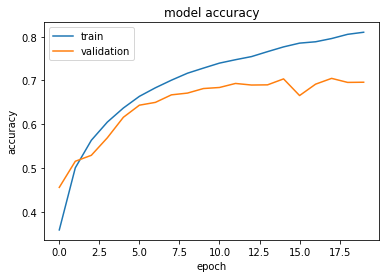

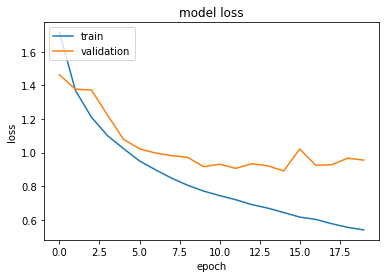

In [6]:

opt = keras.optimizers.Adam(lr=0.001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()

tic = time.time()

#load previously saved model
#model = load_model('./model_nn')

history = model.fit(x_train, y_train,
              batch_size=64,
              epochs=20,
              validation_data=(x_val, y_val),
              shuffle=True, verbose=1, callbacks=[])

toc = time.time()

print "----------------------------"
print "Time taken: ", (toc-tic), "s"
print "----------------------------"

#save the model
#model.save("./model_nn")

#########################
#  SOME PLOTS
#########################

#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#plt.savefig("accuracy_plot.png")

# "Loss"
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#plt.savefig("loss_plot.png")
plt.show()


In [7]:
evaluate = model.evaluate(x_test, y_test)
print(evaluate)

 9984/10000 [============================>.] - ETA: 0s[0.91382192602157597, 0.70999999999999996]
